## 第一讲 图论基础

#### 创建一个简单的图

In [1]:
import networkx as nx

In [2]:
# 创建一个空图，其中不含节点和边
G = nx.Graph()
# 添加节点
G.add_nodes_from([1, 2, 3, 4])
# 添加边
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4)])

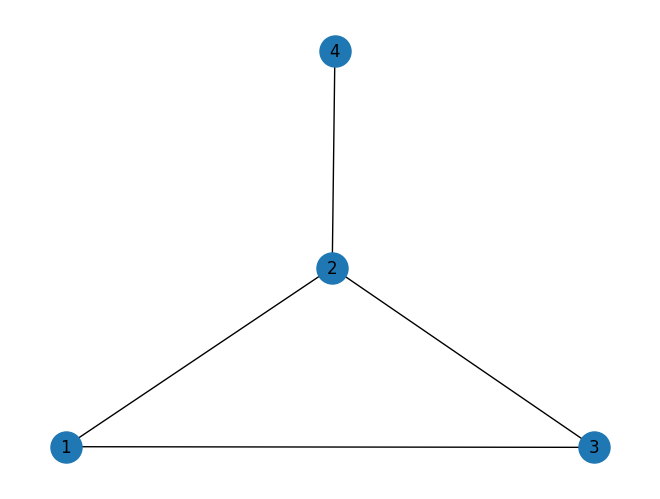

In [3]:
# 可视化
nx.draw(G, node_size=500, with_labels=True)

#### 获取图的邻接矩阵

In [4]:
As = nx.adjacency_matrix(G)
print(As)

  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (3, 1)	1


In [5]:
# 转化为二维数组形式的矩阵
A = As.todense()
print(A)

[[0 1 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [0 1 0 0]]


#### 已知图的邻接矩阵，创建图

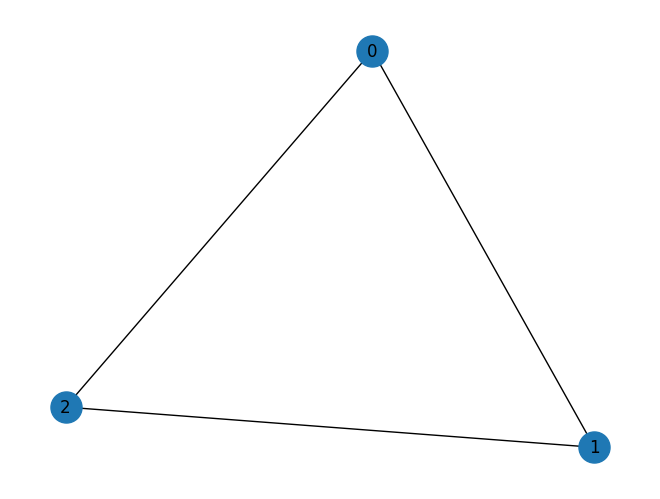

In [6]:
import numpy as np
A = np.array([[0, 1, 1], 
              [1, 0, 1], 
              [1, 1, 0]])
G = nx.from_numpy_array(A)
nx.draw(G, node_size=500, with_labels=True)

#### 加权图

In [7]:
G = nx.Graph()
# 添加权重
G.add_weighted_edges_from([(0, 1, 3.0),
                           (1, 2, 7.5),
                           (0, 2, 1.5)])
# 打印出邻接矩阵
print(nx.adjacency_matrix(G).todense())

[[0.  3.  1.5]
 [3.  0.  7.5]
 [1.5 7.5 0. ]]


#### 有向图

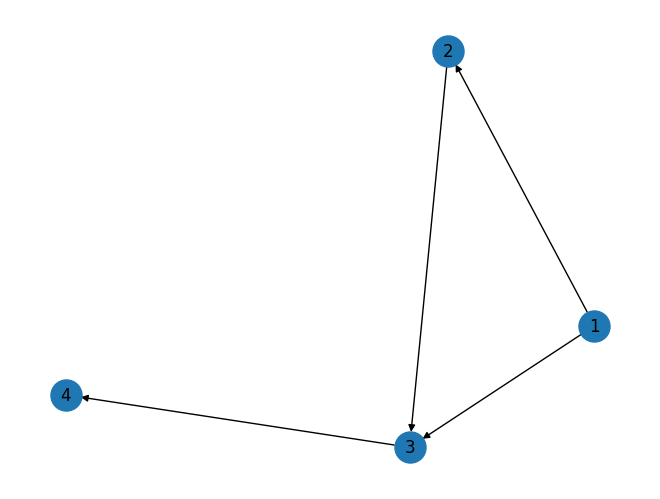

In [8]:
G = nx.DiGraph()
# 添加节点
G.add_nodes_from([1, 2, 3, 4])
# 添加边
G.add_edges_from([(1, 2),
                  (1, 3),
                  (2, 3),
                  (3, 4)])
nx.draw(G, node_size=500, with_labels=True)

#### 度、平均度

In [9]:
G = nx.Graph()
# 添加节点
G.add_nodes_from([1, 2, 3, 4])
# 添加边
G.add_edges_from([(1, 2),
                  (2, 3),
                  (2, 4),
                  (3, 4)])

In [10]:
# 获取网络 G 的度
d = nx.degree(G)
print(d)

[(1, 1), (2, 3), (3, 2), (4, 2)]


In [11]:
d = dict(nx.degree(G))
print(d)
print("平均度为：", sum(d.values()) / len(G.nodes))

{1: 1, 2: 3, 3: 2, 4: 2}
平均度为： 2.0


#### 度分布
度分布是一个概率分布，它表示在图中随机选择一个节点，该节点的度数为  $k$  的概率。通常用  $P(k)$  来表示， $P(k)$  是度为  $k$ 的节点数占总节点数的比例。


不同类型的网络有不同的度分布特征：

    • 随机图：其度分布通常遵循泊松分布，大部分节点的度数集中在某个平均值附近。
    • 无标度网络：其度分布通常遵循幂律分布，也就是说，少数节点具有非常高的度（称为枢纽或中心节点），而大多数节点的度数较低。
    • 小世界网络：具有较高的集聚系数和短平均路径长度，度分布依然接近泊松分布。

In [12]:
# 获取度分布
nx.degree_histogram(G)  # 返回所有位于区间[0, dmax]的度值的频率列表

[0, 1, 2, 1]

#### 绘制分布直方图

In [13]:
import matplotlib.pyplot as plt

In [14]:
x = list(range(max(d.values()) + 1))
y = [i / len(G.nodes) for i in nx.degree_histogram(G)]
print(x)
print(y)

[0, 1, 2, 3]
[0.0, 0.25, 0.5, 0.25]


(0.0, 4.0)

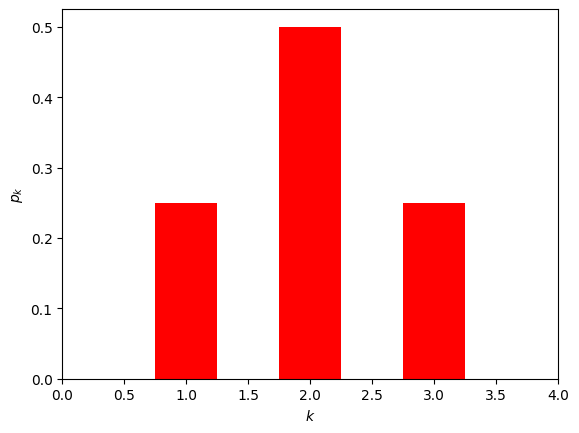

In [15]:
plt.bar(x, y, width=0.5, color='red')
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.xlim([0, 4])

#### 路径和距离

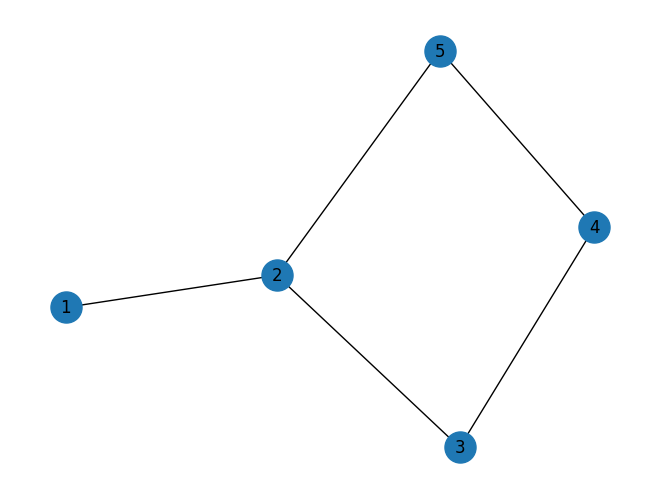

In [16]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_edges_from([(1, 2), (2, 3), (2, 5), (3, 4), (4, 5)])
nx.draw(G, node_size=500, with_labels=True)

In [17]:
nx.shortest_path(G, source=1, target=4)

[1, 2, 3, 4]

In [18]:
# 两个节点之间所有的最短路径
list(nx.all_shortest_paths(G, source=1, target=4))

[[1, 2, 3, 4], [1, 2, 5, 4]]

In [19]:
# 求两个节点的最短路径长度
nx.shortest_path_length(G, source=1, target=4)

3

In [20]:
# 求整个网络的平均距离
nx.average_shortest_path_length(G)

1.6

#### 连通性

In [21]:
Ga = nx.Graph()
Ga.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
Ga.add_edges_from([(1, 2), (1, 3), (2, 3), (4, 7), (5, 6), (5, 7), (6, 7)])
# nx.draw(Ga, node_size=500, with_labels=True)

In [22]:
Gb = nx.Graph()
Gb.add_nodes_from([1,2,3,4,5,6,7])
Gb.add_edges_from([(1,2),(1,3),(2,3),(2,4),(4,7),(5,6),(5,7),(6,7)])
# nx.draw(Gb, node_size=500, with_labels=True)

In [23]:
print(nx.is_connected(Ga))
print(nx.is_connected(Gb))

False
True


#### 集聚系数



局部集聚系数：
$$C_i = \frac{2L_i}{k_i(k_i - 1)}$$
其中，$L_i$ 为节点 $i$ 邻居之间实际存在的连边数， $k_i$为节点 $i$ 的度 



平均集聚系数：局部集聚系数的平均值

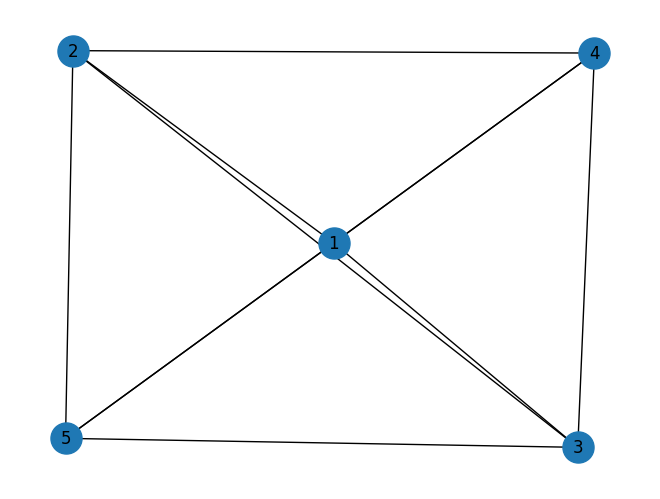

In [24]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5)])
nx.draw(G, node_size=500, with_labels=True)

In [25]:
print(nx.clustering(G, 1))

1.0


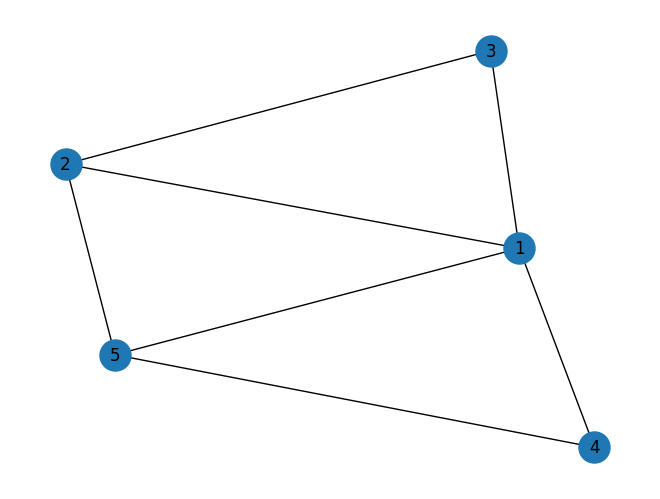

In [26]:
G.remove_edges_from([(2, 4), (3, 4), (3, 5)])
nx.draw(G, node_size=500, with_labels=True)

In [27]:
print(nx.clustering(G, 1))

0.5


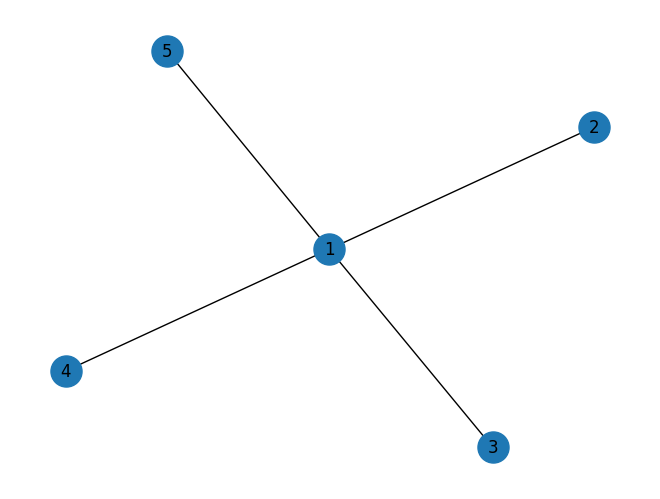

In [28]:
G.remove_edges_from([(2, 3), (2, 5), (4, 5)])
nx.draw(G, node_size=500, with_labels=True)

In [29]:
print(nx.clustering(G, 1))

0


#### 平均集聚系数和全局集聚系数的区别

全局集聚系数：
$$C_{\Delta} = \frac{3 \times 三角形个数}{连通三元组的个数}$$

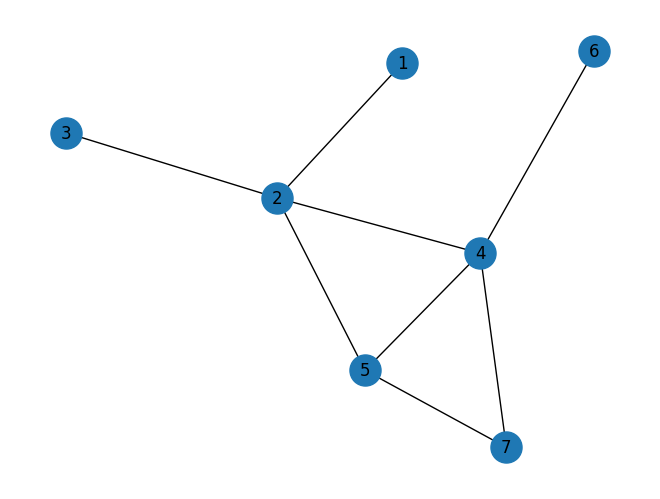

In [30]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7])
G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(4,5),(4,6),(4,7),(5,7)])
nx.draw(G, node_size=500, with_labels=True)

In [31]:
# 平均集聚系数
print(nx.average_clustering(G))

0.3095238095238095


In [32]:
# 全局集聚系数
print(nx.transitivity(G))

0.375
